# PathChess (Educational AlphaZero Clone) Chess Engine Demo

## Introduction
This notebook demonstrates the capabilities of the AlphaZero Chess Engine. It provides an overview of the engine's architecture, its training process, and allows for interactive gameplay.

## Background and Theory
### Monte Carlo Tree Search (MCTS)
Monte Carlo Tree Search (MCTS) is a heuristic search algorithm used in decision processes, such as game playing. It balances exploration of unexplored moves with exploitation of known rewarding moves.

### Neural Network Architecture
AlphaZero uses a deep neural network with layers designed for evaluating board positions and determining the probabilities of possible moves.

## Setup Environment
To run the examples in this notebook, ensure that the required libraries are installed and import them as follows:


In [1]:
import os

In [2]:
# Import necessary libraries
from src.model import build_alpha_zero_model
from main import load_model

# Load a pre-trained model
#model = load_model('models/alpha-path_model')

model = build_alpha_zero_model()
model.compile(optimizer='adam',
              loss={'policy_output': 'categorical_crossentropy', 'value_output': 'mean_squared_error'},
              metrics={'policy_output': 'accuracy', 'value_output': 'mse'})


['C:\\Users\\Shaur\\Desktop\\PathChess', 'C:\\Users\\Shaur\\Anaconda3\\envs\\turozero\\python38.zip', 'C:\\Users\\Shaur\\Anaconda3\\envs\\turozero\\DLLs', 'C:\\Users\\Shaur\\Anaconda3\\envs\\turozero\\lib', 'C:\\Users\\Shaur\\Anaconda3\\envs\\turozero', '', 'C:\\Users\\Shaur\\Anaconda3\\envs\\turozero\\lib\\site-packages', 'C:\\Users\\Shaur\\Anaconda3\\envs\\turozero\\lib\\site-packages\\win32', 'C:\\Users\\Shaur\\Anaconda3\\envs\\turozero\\lib\\site-packages\\win32\\lib', 'C:\\Users\\Shaur\\Anaconda3\\envs\\turozero\\lib\\site-packages\\Pythonwin']


## Model Architecture


In [3]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 4, 8, 8, 14  0           []                               
                                )]                                                                
                                                                                                  
 reshape (Reshape)              (None, 8, 8, 56)     0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 8, 8, 256)    129280      ['reshape[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 8, 8, 256)   1024        ['conv2d[0][0]']             

## Demonstration of Supervised Learning
Here we simulate a training session using pre-loaded data. This section is meant to show how the model can learn from historical game data. There are enough chess games to never have to run over the same dataset multiple times, if you want to you can run through the same dataset multiple times.


In [4]:
from main import begin_supervised_learning
training_history = begin_supervised_learning(model, 'games_database/lichess_elite_2020-05.pgn', 1500)
# save_model(model, 'path_to_my_model.h5')
# model = load_model_from_path('path_to_my_model.h5')
# human_vs_ai(model)

102/102 [==============================] - 3s 27ms/step - loss: 3.6825 - policy_output_loss: 3.2021 - value_output_loss: 0.4804 - policy_output_accuracy: 0.2451 - value_output_mse: 0.4804


## Demonstration of Self-Play and Unsupervised Learning
The engine improves its play by competing against itself. Below, we run a few iterations of self-play to demonstrate how the model updates its strategy. This is extremely inefficient compared to using masters games and is mainly used to show the skill level of the model, in this example the model has not been trained enough so it will perform questionable moves as it doesn't understand a "winning position" yet


In [7]:
from main import begin_unsupervised_learning
begin_unsupervised_learning(model, cycles = 1, games_per_cycle = 2, iters = 1)
# save_model(model, 'path_to_my_model.h5')
# Note this is extremely slow at the moment, alphazero runs on 800 iterations but if you want to see it run quickly, just do 10 iterations
# The quality of this game will be poor regardless since the model hasn't been trained on enough games

NEW GAME STARTED


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 23ms/step
[Event "Self-play training session"]
[Site "Local"]
[Date "2024.04.26"]
[Round "1"]
[White "Model"]
[Black "Model"]
[Result "0-1"]

1. e4 e6 2. d4 d5 3. exd5 exd5 4. c3 c6 5. a3 Bd6 6. Nf3 Nd7 7. Bd3 Ne7 8. O-O O-O 9. Nbd2 Qa5 10. Re1 b6 11. Nf1 h6 12. h4 c5 13. Ng3 Bc7 14. Bf4 g5 15. Qc2 Ng6 16. Be2 Kh7 17. Nf1 Re8 18. Rab1 Rb8 19. Bd6 Bxd6 20. Bd1 Nf8 21. N1h2 c4 22. Ng4 Bf5 23. Ngh2 Bd3 24. Qxd3 Qxa3 25. Qc2 g4 26. Ng5+ Kg7 27. Ne6+ fxe6 28. Rxe6 Qb4 29. Rxe8 Qa3 30. Kf1 Qa1 31. Qe2 Qxb1 32. Rxb8 Bc7 33. Rxf8 Nh8 34. Qxg4+ Kh7 35. Qf4 Kg7 36. Qf6+ Kh7 37. Qf7+ Nxf7 38. Rd8 Qxb2 39. Bc2+ Qxc2 40. Rf8 h5 41. Rxf7+ Kg6 42. Rf6+ Kh7 43. Rf8 Qxf2+ 44. Kxf2 Kh6 45. Re8 Be5 46. Rxe5 Kg6 47. Rf5 Kxf5 48. Nf3 Ke4 49. Ne5 Kf4 50. Nd3+ Ke4 51. Ne1 a5 52. g4 hxg4 53. Nf3 Kd3 54. Ne1+ Ke4 55. Nf3 gxf3 56. Kg1 b5 57. Kh2 b4 58. cxb4 a4 59. b5 c3 60. b6 c2 61. Kh3 c1=Q 62. Kh2 Qc8 63. Kg3 Qd7 64. Kh2 Kd3 65. Kg3 Kd2 66. Kxf3 a3 67. h5 Qb7 68. h6 

NameError: name 'os' is not defined

It plays questionable chess and has a good understanding of positions and the general moves, but when a model blunders a queen for example, the model won't take the queen since the training data (masters games) extremely rarely has straight up winning moves, a better model may start by training on all games where piece blunders are more common and slowly filter out to masters games.

## Evaluation and Analysis
We evaluate the model's performance by displaying its accuracy and loss metrics, and compare it to a baseline if available.


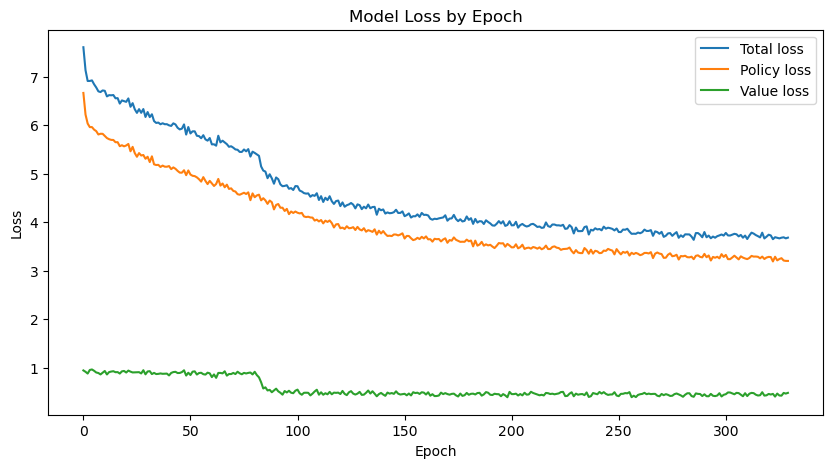

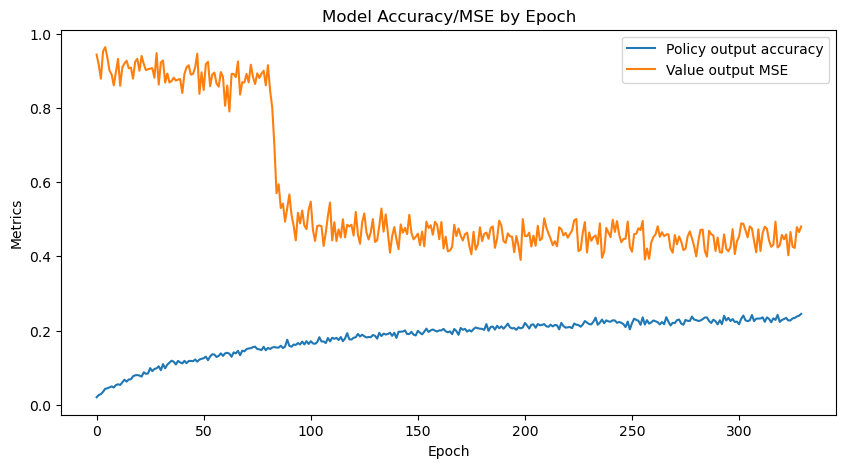

In [6]:
import matplotlib.pyplot as plt

total_loss = []
policy_output_loss = []
value_output_loss = []
policy_output_accuracy = []
value_output_mse = []


for history in training_history:
    total_loss.extend(history['loss'])
    policy_output_loss.extend(history['policy_output_loss'])
    value_output_loss.extend(history['value_output_loss'])
    policy_output_accuracy.extend(history['policy_output_accuracy'])
    value_output_mse.extend(history['value_output_mse'])


plt.figure(figsize=(10, 5))  # Optional: You can specify the size of the plot

plt.plot(total_loss, label='Total loss')
plt.plot(policy_output_loss, label='Policy loss')
plt.plot(value_output_loss, label='Value loss')

plt.title('Model Loss by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))

plt.plot(policy_output_accuracy, label='Policy output accuracy')
plt.plot(value_output_mse, label='Value output MSE')

plt.title('Model Accuracy/MSE by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.legend()
plt.show()


## Conclusion and Further Research
In this notebook, we have explored the functionalities of the AlphaZero chess engine, covering its training and gameplay capabilities. For further research, one could explore enhancements in the neural network architecture or improvement in the MCTS algorithim, especially in its training speed, or perhaps implement an NNUE approach similar to stockfish where the benefits of pure calculation in a chess engine remain. This code will result in an engine that plays logically, but very poorly due to a lack of hardware capabilities, this project is more for educational purposes than practical as there are many optimizations that can be made (such as using C++ directly) in order to make the code more efficient, however this serves as an excellent reference for someone trying to understand how Alpha-Zero works..

## References
- [Link to the original AlphaZero paper](https://arxiv.org/pdf/1712.01815.pdf)

- [Link to code for board encodings](https://www.freecodecamp.org/news/create-a-self-playing-ai-chess-engine-from-scratch/)

- [Assistance for Monte Carlo Tree Search](https://www.youtube.com/watch?v=wuSQpLinRB4&t=7691s)
